In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
from tensorflow.keras.utils import to_categorical

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(train_labels.shape)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def load_dataset():
	(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
	train_labels = to_categorical(train_labels)
	test_labels = to_categorical(test_labels)
	return train_images, train_labels, test_images, test_labels

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(50000, 1)


In [4]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [6]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss= keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [7]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [8]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 14s 16ms/step - loss: 2.3012 - accuracy: 0.1385 - val_loss: 2.2997 - val_accuracy: 0.1509
Epoch 2/10
274/274 [==============================] - 4s 14ms/step - loss: 2.2985 - accuracy: 0.1651 - val_loss: 2.2974 - val_accuracy: 0.1655
Epoch 3/10
274/274 [==============================] - 4s 14ms/step - loss: 2.2962 - accuracy: 0.1797 - val_loss: 2.2951 - val_accuracy: 0.1794
Epoch 4/10
274/274 [==============================] - 4s 14ms/step - loss: 2.2937 - accuracy: 0.1917 - val_loss: 2.2926 - val_accuracy: 0.1951
Epoch 5/10
274/274 [==============================] - 4s 14ms/step - loss: 2.2909 - accuracy: 0.2014 - val_loss: 2.2896 - val_accuracy: 0.2023
Epoch 6/10
274/274 [==============================] - 4s 14ms/step - loss: 2.2876 - accuracy: 0.2126 - val_loss: 2.2859 - val_accuracy: 0.2100
Epoch 7/10
274/274 [==============================] - 4s 14ms/step - loss: 2.2835 - accuracy: 0.2193 - val_loss: 2.2813 - val_accuracy: 0.214

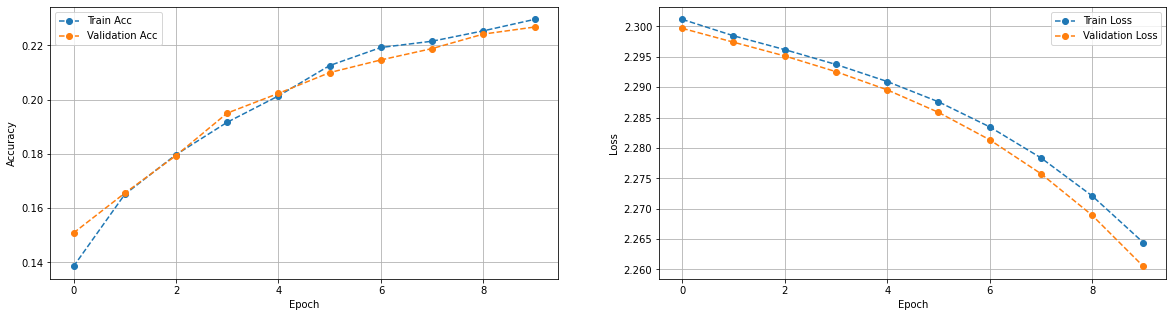

In [9]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [10]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 4s 14ms/step - loss: 2.2547 - accuracy: 0.2317 - val_loss: 2.2497 - val_accuracy: 0.2287
Epoch 2/15
274/274 [==============================] - 4s 14ms/step - loss: 2.2422 - accuracy: 0.2332 - val_loss: 2.2356 - val_accuracy: 0.2325
Epoch 3/15
274/274 [==============================] - 4s 14ms/step - loss: 2.2257 - accuracy: 0.2365 - val_loss: 2.2169 - val_accuracy: 0.2341
Epoch 4/15
274/274 [==============================] - 4s 15ms/step - loss: 2.2049 - accuracy: 0.2378 - val_loss: 2.1948 - val_accuracy: 0.2424
Epoch 5/15
274/274 [==============================] - 4s 14ms/step - loss: 2.1807 - accuracy: 0.2413 - val_loss: 2.1690 - val_accuracy: 0.2417
Epoch 6/15
274/274 [==============================] - 4s 14ms/step - loss: 2.1531 - accuracy: 0.2441 - val_loss: 2.1411 - val_accuracy: 0.2427
Epoch 7/15
274/274 [==============================] - 4s 16ms/step - loss: 2.1241 - accuracy: 0.2469 - val_loss: 2.1128 - val_accuracy: 0.2497

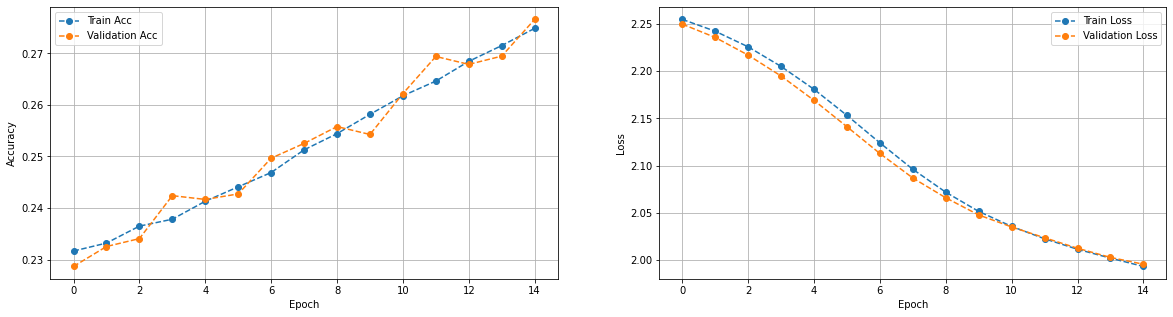

In [11]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [12]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 4s 15ms/step - loss: 1.9850 - accuracy: 0.2788 - val_loss: 1.9868 - val_accuracy: 0.2786
Epoch 2/20
274/274 [==============================] - 4s 16ms/step - loss: 1.9771 - accuracy: 0.2811 - val_loss: 1.9786 - val_accuracy: 0.2777
Epoch 3/20
274/274 [==============================] - 4s 14ms/step - loss: 1.9693 - accuracy: 0.2855 - val_loss: 1.9738 - val_accuracy: 0.2872
Epoch 4/20
274/274 [==============================] - 4s 14ms/step - loss: 1.9608 - accuracy: 0.2880 - val_loss: 1.9623 - val_accuracy: 0.2850
Epoch 5/20
274/274 [==============================] - 4s 14ms/step - loss: 1.9532 - accuracy: 0.2883 - val_loss: 1.9556 - val_accuracy: 0.2919
Epoch 6/20
274/274 [==============================] - 4s 16ms/step - loss: 1.9448 - accuracy: 0.2927 - val_loss: 1.9461 - val_accuracy: 0.2961
Epoch 7/20
274/274 [==============================] - 4s 16ms/step - loss: 1.9369 - accuracy: 0.2959 - val_loss: 1.9384 - val_accuracy: 0.2981

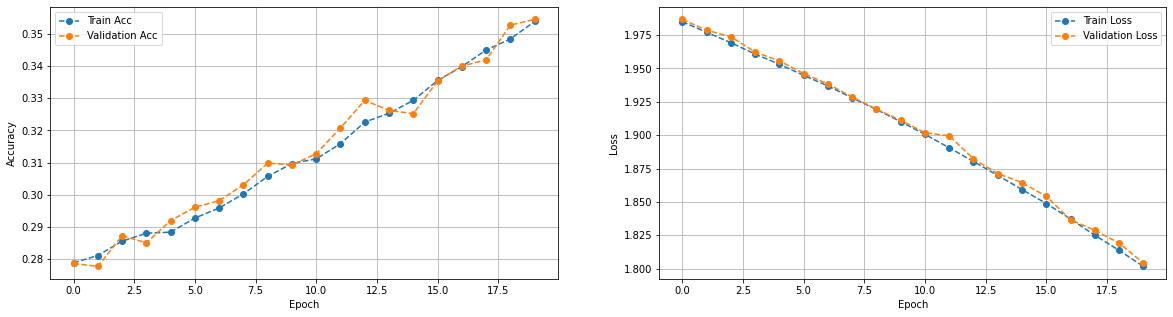

In [13]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [14]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 4s 15ms/step - loss: 1.7901 - accuracy: 0.3585 - val_loss: 1.7902 - val_accuracy: 0.3574
Epoch 2/25
274/274 [==============================] - 4s 14ms/step - loss: 1.7781 - accuracy: 0.3630 - val_loss: 1.7780 - val_accuracy: 0.3617
Epoch 3/25
274/274 [==============================] - 4s 14ms/step - loss: 1.7665 - accuracy: 0.3671 - val_loss: 1.7692 - val_accuracy: 0.3638
Epoch 4/25
274/274 [==============================] - 4s 14ms/step - loss: 1.7561 - accuracy: 0.3722 - val_loss: 1.7553 - val_accuracy: 0.3735
Epoch 5/25
274/274 [==============================] - 4s 16ms/step - loss: 1.7441 - accuracy: 0.3779 - val_loss: 1.7746 - val_accuracy: 0.3633
Epoch 6/25
274/274 [==============================] - 4s 14ms/step - loss: 1.7330 - accuracy: 0.3814 - val_loss: 1.7417 - val_accuracy: 0.3770
Epoch 7/25
274/274 [==============================] - 4s 14ms/step - loss: 1.7212 - accuracy: 0.3856 - val_loss: 1.7287 - val_accuracy: 0.3776

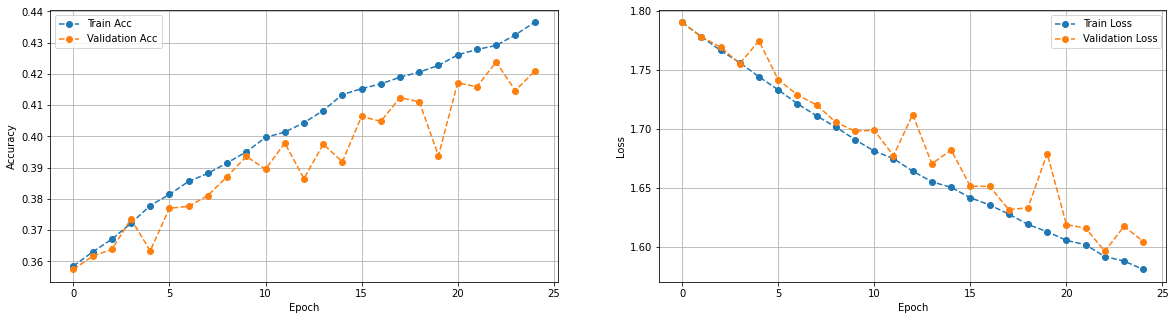

In [15]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [16]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 4s 15ms/step - loss: 1.5761 - accuracy: 0.4376 - val_loss: 1.5842 - val_accuracy: 0.4315
Epoch 2/30
274/274 [==============================] - 4s 13ms/step - loss: 1.5705 - accuracy: 0.4366 - val_loss: 1.5959 - val_accuracy: 0.4279
Epoch 3/30
274/274 [==============================] - 4s 14ms/step - loss: 1.5619 - accuracy: 0.4418 - val_loss: 1.5805 - val_accuracy: 0.4279
Epoch 4/30
274/274 [==============================] - 4s 14ms/step - loss: 1.5602 - accuracy: 0.4400 - val_loss: 1.5929 - val_accuracy: 0.4196
Epoch 5/30
274/274 [==============================] - 4s 14ms/step - loss: 1.5524 - accuracy: 0.4465 - val_loss: 1.5580 - val_accuracy: 0.4357
Epoch 6/30
274/274 [==============================] - 4s 14ms/step - loss: 1.5453 - accuracy: 0.4458 - val_loss: 1.5561 - val_accuracy: 0.4370
Epoch 7/30
274/274 [==============================] - 4s 14ms/step - loss: 1.5415 - accuracy: 0.4484 - val_loss: 1.5599 - val_accuracy: 0.4331

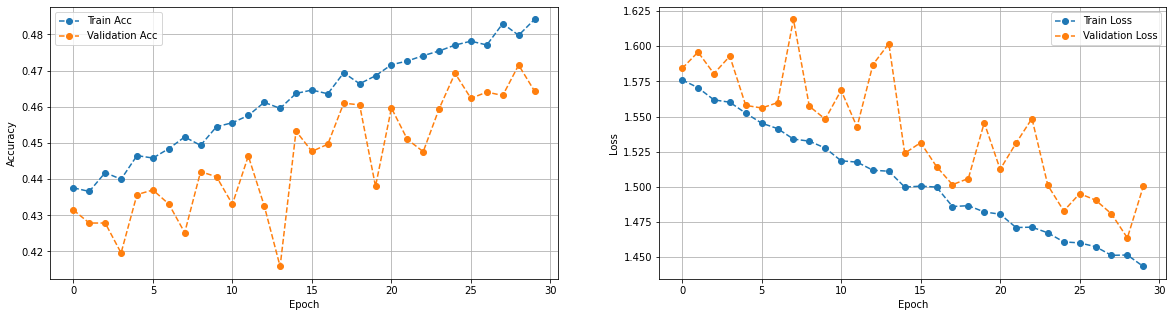

In [17]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [18]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 4s 15ms/step - loss: 1.4408 - accuracy: 0.4840 - val_loss: 1.5541 - val_accuracy: 0.4427
Epoch 2/35
274/274 [==============================] - 4s 16ms/step - loss: 1.4362 - accuracy: 0.4850 - val_loss: 1.4788 - val_accuracy: 0.4659
Epoch 3/35
274/274 [==============================] - 4s 14ms/step - loss: 1.4383 - accuracy: 0.4866 - val_loss: 1.4738 - val_accuracy: 0.4686
Epoch 4/35
274/274 [==============================] - 4s 14ms/step - loss: 1.4307 - accuracy: 0.4872 - val_loss: 1.4499 - val_accuracy: 0.4816
Epoch 5/35
274/274 [==============================] - 4s 14ms/step - loss: 1.4254 - accuracy: 0.4906 - val_loss: 1.4468 - val_accuracy: 0.4836
Epoch 6/35
274/274 [==============================] - 4s 16ms/step - loss: 1.4240 - accuracy: 0.4914 - val_loss: 1.4482 - val_accuracy: 0.4816
Epoch 7/35
274/274 [==============================] - 4s 14ms/step - loss: 1.4197 - accuracy: 0.4937 - val_loss: 1.4476 - val_accuracy: 0.4785

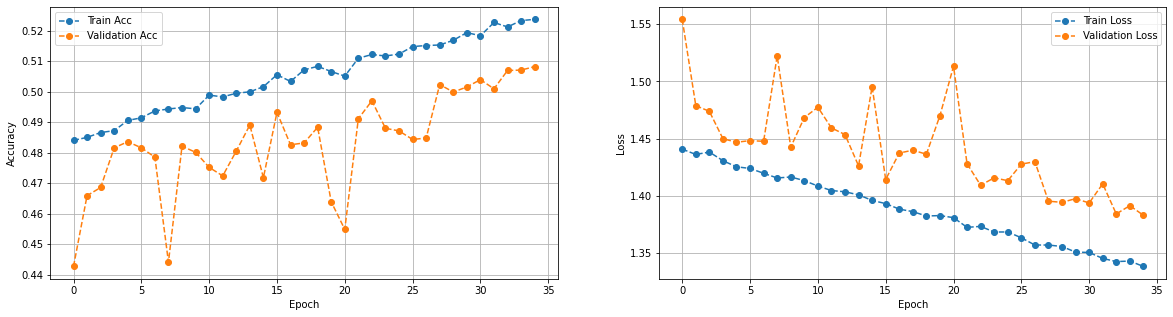

In [19]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [20]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 4s 16ms/step - loss: 1.3365 - accuracy: 0.5241 - val_loss: 1.3689 - val_accuracy: 0.5155
Epoch 2/40
274/274 [==============================] - 4s 16ms/step - loss: 1.3314 - accuracy: 0.5267 - val_loss: 1.4360 - val_accuracy: 0.4886
Epoch 3/40
274/274 [==============================] - 4s 16ms/step - loss: 1.3291 - accuracy: 0.5264 - val_loss: 1.4294 - val_accuracy: 0.4951
Epoch 4/40
274/274 [==============================] - 4s 16ms/step - loss: 1.3272 - accuracy: 0.5281 - val_loss: 1.4167 - val_accuracy: 0.4894
Epoch 5/40
274/274 [==============================] - 4s 14ms/step - loss: 1.3262 - accuracy: 0.5279 - val_loss: 1.3691 - val_accuracy: 0.5134
Epoch 6/40
274/274 [==============================] - 4s 14ms/step - loss: 1.3227 - accuracy: 0.5295 - val_loss: 1.3999 - val_accuracy: 0.5009
Epoch 7/40
274/274 [==============================] - 4s 16ms/step - loss: 1.3189 - accuracy: 0.5303 - val_loss: 1.3605 - val_accuracy: 0.5115

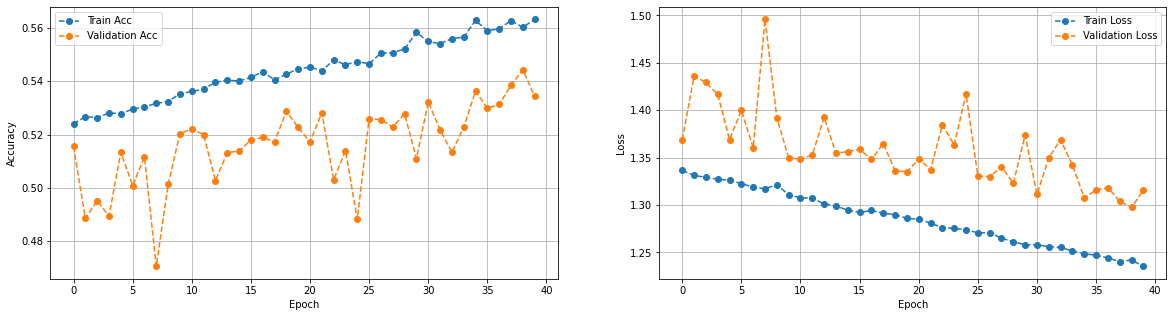

In [21]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [22]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 4s 15ms/step - loss: 1.2310 - accuracy: 0.5659 - val_loss: 1.2924 - val_accuracy: 0.5453
Epoch 2/45
274/274 [==============================] - 4s 16ms/step - loss: 1.2316 - accuracy: 0.5656 - val_loss: 1.3595 - val_accuracy: 0.5209
Epoch 3/45
274/274 [==============================] - 4s 16ms/step - loss: 1.2290 - accuracy: 0.5670 - val_loss: 1.2920 - val_accuracy: 0.5393
Epoch 4/45
274/274 [==============================] - 4s 14ms/step - loss: 1.2289 - accuracy: 0.5652 - val_loss: 1.3287 - val_accuracy: 0.5293
Epoch 5/45
274/274 [==============================] - 4s 13ms/step - loss: 1.2239 - accuracy: 0.5662 - val_loss: 1.2993 - val_accuracy: 0.5376
Epoch 6/45
274/274 [==============================] - 4s 14ms/step - loss: 1.2205 - accuracy: 0.5669 - val_loss: 1.3037 - val_accuracy: 0.5389
Epoch 7/45
274/274 [==============================] - 4s 14ms/step - loss: 1.2201 - accuracy: 0.5712 - val_loss: 1.2859 - val_accuracy: 0.5455

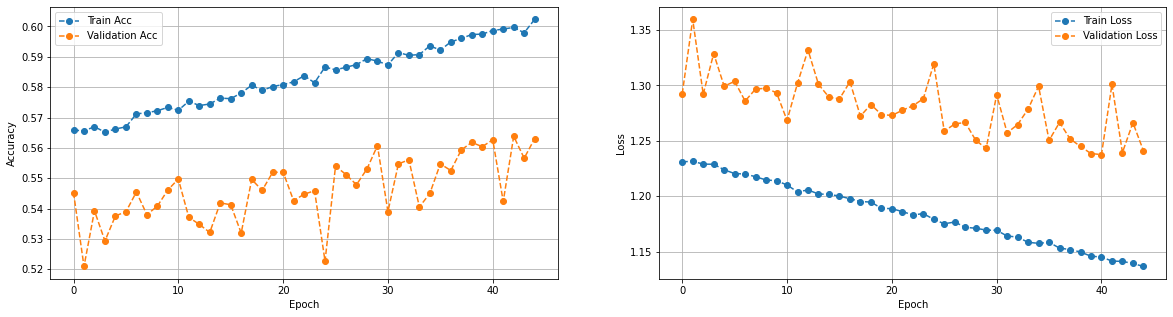

In [23]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [24]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 4s 15ms/step - loss: 1.1364 - accuracy: 0.6016 - val_loss: 1.2371 - val_accuracy: 0.5610
Epoch 2/50
274/274 [==============================] - 4s 14ms/step - loss: 1.1332 - accuracy: 0.6033 - val_loss: 1.2522 - val_accuracy: 0.5501
Epoch 3/50
274/274 [==============================] - 4s 14ms/step - loss: 1.1320 - accuracy: 0.6036 - val_loss: 1.2223 - val_accuracy: 0.5669
Epoch 4/50
274/274 [==============================] - 4s 14ms/step - loss: 1.1305 - accuracy: 0.6025 - val_loss: 1.2310 - val_accuracy: 0.5659
Epoch 5/50
274/274 [==============================] - 4s 13ms/step - loss: 1.1278 - accuracy: 0.6032 - val_loss: 1.2114 - val_accuracy: 0.5764
Epoch 6/50
274/274 [==============================] - 4s 14ms/step - loss: 1.1227 - accuracy: 0.6047 - val_loss: 1.2597 - val_accuracy: 0.5556
Epoch 7/50
274/274 [==============================] - 4s 13ms/step - loss: 1.1212 - accuracy: 0.6063 - val_loss: 1.2499 - val_accuracy: 0.5626

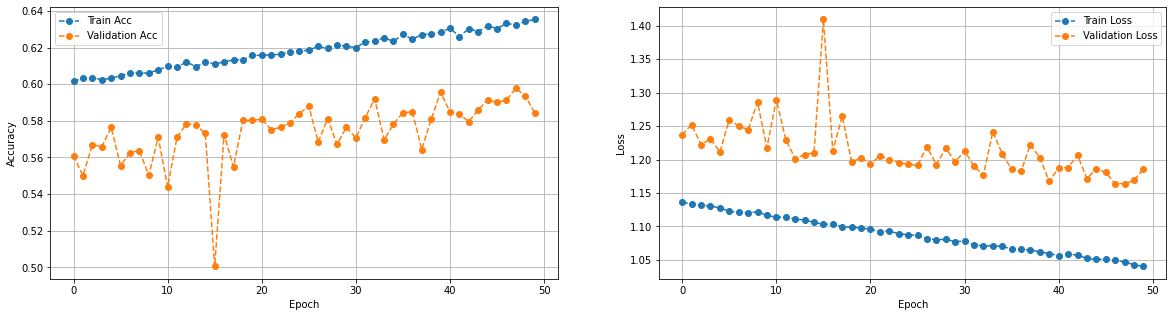

In [25]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()